# Battle of the neighborhoods in San Francisco, CA
##### Capstone Project; The Battle of the Neighborhoods, 
##### The 'Applied Data Science Capstone' Coursera Course is part of IBM's Professional Certificate 'Data Scientist'

## Table of contents

1\. [Introduction](#introduction)

2\. [Data](#data)

    2.1 San Francisco neighborhoods 
    2.2 Exploring San Francisco's neighborhoods 
    2.3 Age distribution per neighboorhood
    2.4 Exploring age distribution per neighborhood 
    2.5 Venues per neighborhood
    2.6 Exploring venues per neighborhood

3\. [Methodology](#methodology)

4\. [Analysis](#analysis)

    4.1 Age distribution per neighborhood
    4.2 Analysis of age distribution
    4.3 Age Venues Equation (AVE) per neighborhood
    4.4 Analysis of AVE scores    
    4.5 Clustering neighborhoods with K-Means
    4.6 Analysis of clustered neighborhoods 
    

5\. [Results and Discussion](#results)

6\. [Conclusion](#conclusion)


## 1. Introduction <a name="introduction"></a>

The CBD,  or cannabidiol, market is a fast growing market which offers CBD in a broad range of products. Well-known product forms are oils/tinctures, lotions/balms, and gummies. Lesser-known CBD infused products are bedsheets, bath bombs, and dog treats. According to Consumer Reports (2019) CBD products are primarily used to reduce stress/anxiety and joint pain (61%), and insomnia (10%). Recreational use comprises 10% of CBD use, and 33% of CBD-only users is 20-34 years old. The Brightfield Group (2017) expects the CBD market to grow to $25 billion by 2025, up from 4.67 million in 2017. 

Currently the leading market in the US is California (Statista, 2021). Our client, a medium sized CBD seller with a broad range of products, has decided to open a store in San Francisco, CA. Before starting the search for a suitable location, the company asked us to make a data driven recommendation on an area that falls within the following guidelines (in order of importance):
1. The preferred area is a cluster of neighborhoods, although a single neighborhood is not rejected beforehand.
2. The dominant age group in the area is 20 -34 year.
3. The area has enough businesses to attract people that are interested health and/or are looking for fun. Examples are organic shops, pharmacies with CBD, vitamins and supplements on their shelves, coffeeshops, restaurants and/or nightlife.

This report describes the subsequent steps followed in the research. The first section is the 'Data' section. Here the report shows how the data was gathered, cleaned and prepared. Next the 'Methodology' section describes which techniques were used to analyze the data. As its title suggests this is done in the 'Analysis' section. The outcome of the analysis is discussed in the 'Results and Discussion' section. Finally, some concluding remarks and thoughts on the research are made in the 'Conclusion' section.

## 2. Data <a name="data"></a>

Based on the guidelines data will be gathered regarding:
- Neighborhoods of San Francisco. Neighborhoods will be defined by their zip code. 
- Age distribution in the San Francisco neighborhoods
- Top 5 venues in the San Francisco neighborhoods

Following resources will be used to get and process the information:
- The neighborhoods and their Zip Codes will be scraped from the web. The latitudes and longitudes of the neighborhoods will be added by geocoding using 'uszipcode' (zip code database in Python).
- The coordinates of San Francisco will be obtained by using 'Geopy Library'.
- The age distribution per zip code will be extracted from the American Community Survey (ACS) of the US Census Bureau (2019).
- The neighborhoods, the distribution of the 20-34 age group and the distribution of the venues will be mapped using the Folium library.
- The top 5 venues per neighborhood, with their type and relative presence will be obtained using Foursquare API.

In [2]:
%%capture

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generatio

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium==0.5.0
import folium # plotting library

### 2.1 San Francisco neighborhoods

The collection of neigborhoods and coordinates.

In [3]:
# Get csv file with zip codes (source: http://www.healthysf.org/bdi/outcomes/zipmap.htm) 
# Study df properties

df = pd.read_csv(r'C:\Users\Neeke\OneDrive\Documents\Data Science\CAPSTONE Project\SF_ZIP.csv')
display(df.shape)
print('\n')
df.info()
print('\n')
df.head()

(21, 2)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Zip Code      21 non-null     int64 
 1   Neighborhood  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes




,Zip Code,Neighborhood
0,94102,Hayes Valley/Tenderloin/North of Market
1,94103,South of Market
2,94107,Potrero Hill
3,94108,Chinatown
4,94109,Polk/Russian Hill (Nob Hill)


In [4]:
%%capture
# Import uszipcode (zipcode database in Python)

!pip install uszipcode
from uszipcode import SearchEngine

In [5]:
# Attach latitude and longitude to data using 'uszipcode' 
# Thank you, Vanessa Leung (2019) for example code

search = SearchEngine(simple_zipcode=True)

latitude = []
longitude = []

for index, row in df.iterrows():
    zipcode = search.by_zipcode(row["Zip Code"]).to_dict()
    latitude.append(zipcode.get("lat"))
    longitude.append(zipcode.get("lng"))

df["Latitude"] = latitude
df["Longitude"] = longitude

df

,Zip Code,Neighborhood,Latitude,Longitude
0,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420
1,94103,South of Market,37.780,-122.410
2,94107,Potrero Hill,37.770,-122.390
3,94108,Chinatown,37.791,-122.409
4,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420
5,94110,Inner Mission/Bernal Heights,37.750,-122.420
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.720,-122.440
7,94114,Castro/Noe Valley,37.760,-122.440
8,94115,Western Addition/Japantown,37.790,-122.440
9,94116,Parkside/Forest Hill,37.740,-122.480


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Zip Code      21 non-null     int64  
 1   Neighborhood  21 non-null     object 
 2   Latitude      21 non-null     float64
 3   Longitude     21 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 800.0+ bytes


### 2.2 Exploring San Francisco's neighborhoods

Mapping the spread of the neigborhoods.

In [7]:
# longitude Outer Richmond is wrong (label drops in sea)
# Longitude Marina = North Beach/Chinatown
# Correcting longitude Outer Richmond, and seperating Marina from North Beach/Chinatown by inserting exact longitude

address_lst = ['Outer Richmond, San Francisco, CA', 'Marina, San francisco, CA']

for address in address_lst:
    geolocator_lst = Nominatim(user_agent="list_explorer")
    location_lst = geolocator_lst.geocode(address)
    latitude_lst = location_lst.latitude
    longitude_lst = location_lst.longitude
    print('The geograpical coordinates of',  address, 'are {}, {}.'.format(latitude_lst, longitude_lst))
 

The geograpical coordinates of Outer Richmond, San Francisco, CA are 37.7770459, -122.4654532.
The geograpical coordinates of Marina, San francisco, CA are 37.7997929, -122.4352048.


In [8]:
# Change longitude Outer Richmond
df.loc[df['Zip Code'] == 94121, ['Longitude']] = -122.4654532

In [9]:
# Change longitude Marina, and check values in df
df.loc[df['Zip Code'] == 94123, ['Longitude']] = -122.4352048

print("The longitude of Outer Richmond is:", df.iloc[11, 3], '\n', 'The longitude of Marina is:', df.iloc[14, 3])

The longitude of Outer Richmond is: -122.46 
 The longitude of Marina is: -122.4352048


In [10]:
# Use Geopy Library to get Latitude and Longitude of San Francisco, CA

address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="SF_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of San Francisco are 37.7790262, -122.419906.


In [11]:
# Create map of San Francisco neighborhoods using latitude and longitude values
map_sf = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf


### 2.3 Age distribution per neighboorhood

Cleaning and preparing the age distribution data from the Census Bureau.

In [12]:
# Load data set into dataframe, df2
# Source: American Community Survey (2019), US Census Bureau

file = (r"C:\Users\Neeke\OneDrive\Documents\Data Science\CAPSTONE Project\ACSDP5Y2019_SFZIP_perc.xlsx")
data = pd.ExcelFile(file)
df2 = data.parse(2)
display(df2.shape)
print('\n')
print(df2.info())
print('\n')
df2.head()

(21, 6)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   21 non-null     int64  
 1   0-19 years   21 non-null     float64
 2   20-34 years  21 non-null     float64
 3   35-54 years  21 non-null     float64
 4   55-64 years  21 non-null     float64
 5   65+ years    21 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB
None




,Unnamed: 0,0-19 years,20-34 years,35-54 years,55-64 years,65+ years
0,94102,0.106,0.313,0.285,0.111,0.225
1,94103,0.092,0.369,0.324,0.111,0.167
2,94107,0.123,0.369,0.307,0.106,0.106
3,94108,0.096,0.314,0.256,0.111,0.225
4,94109,0.070,0.391,0.260,0.111,0.167


In [13]:
# Rename unnamed column 
df2 = df2.rename({'Unnamed: 0': 'Zip Code'}, axis=1)
df2.head()

,Zip Code,0-19 years,20-34 years,35-54 years,55-64 years,65+ years
0,94102,0.106,0.313,0.285,0.111,0.225
1,94103,0.092,0.369,0.324,0.111,0.167
2,94107,0.123,0.369,0.307,0.106,0.106
3,94108,0.096,0.314,0.256,0.111,0.225
4,94109,0.070,0.391,0.260,0.111,0.167


In [14]:
# Merge df and df2 to create one dataframe: df_sf

df_sf= df.merge(df2, on='Zip Code')
df_sf.head()


,Zip Code,Neighborhood,Latitude,Longitude,0-19 years,20-34 years,35-54 years,55-64 years,65+ years
0,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420,0.106,0.313,0.285,0.111,0.225
1,94103,South of Market,37.780,-122.410,0.092,0.369,0.324,0.111,0.167
2,94107,Potrero Hill,37.770,-122.390,0.123,0.369,0.307,0.106,0.106
3,94108,Chinatown,37.791,-122.409,0.096,0.314,0.256,0.111,0.225
4,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420,0.070,0.391,0.260,0.111,0.167


### 2.4 Exploring age distribution per neighborhood

Exploraing and visualizing the age distribution per neighborhood using a bubble map, tables and bar charts.

In [15]:
# Create bubble map of age distribution in group 20-34 year using latitude and longitude values
map_bsf = folium.Map(location=[latitude, longitude], zoom_start=12)

# add bubbles to map
for i in range(0,len(df_sf)):
   folium.CircleMarker(
      location=[df_sf.iloc[i]['Latitude'], df_sf.iloc[i]['Longitude']],
      popup=df_sf.iloc[i]['Neighborhood'],
      radius=float(df_sf.iloc[i]['20-34 years'])*50,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(map_bsf)

map_bsf

---- Age groups(in %) in Hayes Valley/Tenderloin/North of Market ----
     Age Group Percentage
4   0-19 years      0.106
5  20-34 years      0.313
6  35-54 years      0.285
7  55-64 years      0.111
8    65+ years      0.225




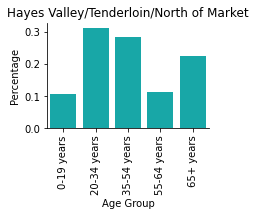

_____________________________________________________________________________


---- Age groups(in %) in South of Market ----
     Age Group Percentage
4   0-19 years      0.092
5  20-34 years      0.369
6  35-54 years      0.324
7  55-64 years      0.111
8    65+ years      0.167




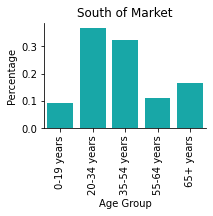

_____________________________________________________________________________


---- Age groups(in %) in Potrero Hill ----
     Age Group Percentage
4   0-19 years      0.123
5  20-34 years      0.369
6  35-54 years      0.307
7  55-64 years      0.106
8    65+ years      0.106




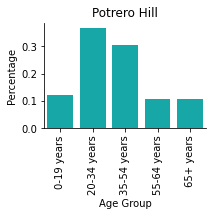

_____________________________________________________________________________


---- Age groups(in %) in Chinatown ----
     Age Group Percentage
4   0-19 years      0.096
5  20-34 years      0.314
6  35-54 years      0.256
7  55-64 years      0.111
8    65+ years      0.225




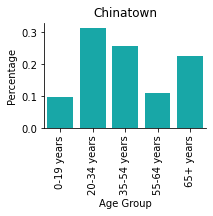

_____________________________________________________________________________


---- Age groups(in %) in Polk/Russian Hill (Nob Hill) ----
     Age Group Percentage
4   0-19 years       0.07
5  20-34 years      0.391
6  35-54 years       0.26
7  55-64 years      0.111
8    65+ years      0.167




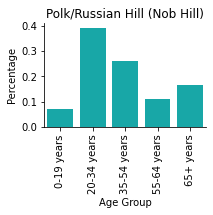

_____________________________________________________________________________


---- Age groups(in %) in Inner Mission/Bernal Heights ----
     Age Group Percentage
4   0-19 years      0.156
5  20-34 years       0.29
6  35-54 years      0.342
7  55-64 years      0.106
8    65+ years      0.106




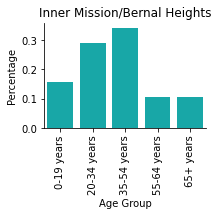

_____________________________________________________________________________


---- Age groups(in %) in Ingelside-Excelsior/Crocker-Amazon ----
     Age Group Percentage
4   0-19 years      0.178
5  20-34 years      0.219
6  35-54 years      0.286
7  55-64 years      0.144
8    65+ years      0.172




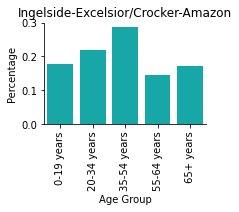

_____________________________________________________________________________


---- Age groups(in %) in Castro/Noe Valley ----
     Age Group Percentage
4   0-19 years      0.118
5  20-34 years       0.28
6  35-54 years      0.352
7  55-64 years      0.114
8    65+ years      0.134




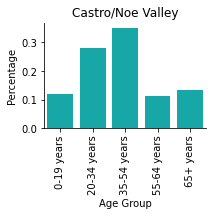

_____________________________________________________________________________


---- Age groups(in %) in Western Addition/Japantown ----
     Age Group Percentage
4   0-19 years      0.132
5  20-34 years      0.328
6  35-54 years      0.284
7  55-64 years       0.09
8    65+ years      0.166




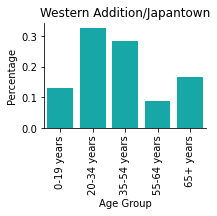

_____________________________________________________________________________


---- Age groups(in %) in Parkside/Forest Hill ----
     Age Group Percentage
4   0-19 years      0.172
5  20-34 years      0.207
6  35-54 years      0.277
7  55-64 years      0.132
8    65+ years      0.212




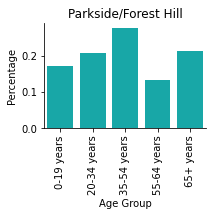

_____________________________________________________________________________


---- Age groups(in %) in Haight-Ashbury ----
     Age Group Percentage
4   0-19 years      0.154
5  20-34 years      0.393
6  35-54 years       0.29
7  55-64 years      0.073
8    65+ years      0.089




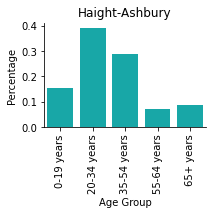

_____________________________________________________________________________


---- Age groups(in %) in Inner Richmond ----
     Age Group Percentage
4   0-19 years      0.147
5  20-34 years      0.311
6  35-54 years      0.267
7  55-64 years      0.116
8    65+ years       0.16




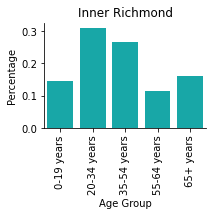

_____________________________________________________________________________


---- Age groups(in %) in Outer Richmond ----
     Age Group Percentage
4   0-19 years       0.16
5  20-34 years      0.225
6  35-54 years      0.284
7  55-64 years       0.14
8    65+ years      0.191




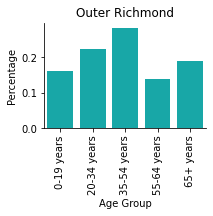

_____________________________________________________________________________


---- Age groups(in %) in Sunset ----
     Age Group Percentage
4   0-19 years      0.151
5  20-34 years      0.276
6  35-54 years      0.291
7  55-64 years      0.117
8    65+ years      0.164




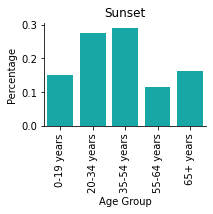

_____________________________________________________________________________


---- Age groups(in %) in Marina ----
     Age Group Percentage
4   0-19 years      0.107
5  20-34 years      0.426
6  35-54 years       0.27
7  55-64 years      0.068
8    65+ years      0.127




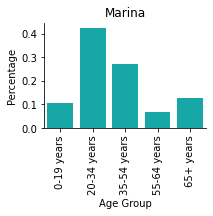

_____________________________________________________________________________


---- Age groups(in %) in Bayview-Hunters Point ----
     Age Group Percentage
4   0-19 years      0.236
5  20-34 years      0.227
6  35-54 years      0.265
7  55-64 years       0.13
8    65+ years      0.142




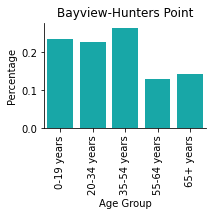

_____________________________________________________________________________


---- Age groups(in %) in St. Francis Wood/Miraloma/West Portal ----
     Age Group Percentage
4   0-19 years      0.207
5  20-34 years      0.154
6  35-54 years      0.287
7  55-64 years      0.146
8    65+ years      0.208




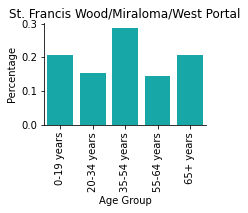

_____________________________________________________________________________


---- Age groups(in %) in Twin Peaks-Glen Park ----
     Age Group Percentage
4   0-19 years      0.169
5  20-34 years      0.217
6  35-54 years       0.32
7  55-64 years      0.132
8    65+ years      0.163




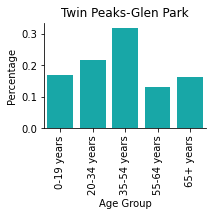

_____________________________________________________________________________


---- Age groups(in %) in Lake Merced ----
     Age Group Percentage
4   0-19 years      0.222
5  20-34 years      0.298
6  35-54 years      0.219
7  55-64 years      0.105
8    65+ years      0.156




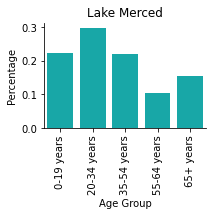

_____________________________________________________________________________


---- Age groups(in %) in North Beach/Chinatown ----
     Age Group Percentage
4   0-19 years      0.104
5  20-34 years      0.291
6  35-54 years      0.249
7  55-64 years       0.13
8    65+ years      0.225




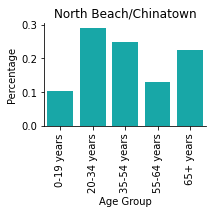

_____________________________________________________________________________


---- Age groups(in %) in Visitacion Valley/Sunnydale ----
     Age Group Percentage
4   0-19 years        0.2
5  20-34 years      0.202
6  35-54 years      0.283
7  55-64 years      0.149
8    65+ years      0.164




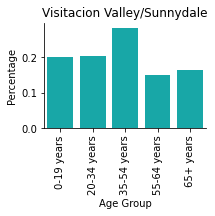

_____________________________________________________________________________




In [16]:
# Show age groups per neighborhood in table and bargraph using seaborn

for NH in df_sf['Neighborhood']:
    print("---- Age groups(in %) in "+NH+" ----")
    temp = df_sf[df_sf['Neighborhood'] == NH].T.reset_index()
    temp.columns = ['Age Group', 'Percentage']
    temp = temp.iloc[4:]
    print(temp)
    print('\n')
    
    sns.catplot(x='Age Group',
                y='Percentage', 
                data=temp, 
                kind='bar', 
                color='c',
                label='Neighborhood',
                height=2, aspect=1.5
               )
    plt.title(NH)
    plt.xticks(rotation=90)
    plt.show()
    print('_____________________________________________________________________________')
    print('\n')

### 2.5 Venues per neighborhood

Getting the venues information of each neighborhood using Foursquare,

In [17]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'G4EHZJQYOZ0KGN3FZHY1KVW2H0P35SPDL1JWTDENJ5T0ZO0L' # Foursquare ID
CLIENT_SECRET = 'BF152LX32OOGU2ZY2PTZDMEVDMHLTF32CRF5DH0AYC3E5CUM' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: G4EHZJQYOZ0KGN3FZHY1KVW2H0P35SPDL1JWTDENJ5T0ZO0L
CLIENT_SECRET:BF152LX32OOGU2ZY2PTZDMEVDMHLTF32CRF5DH0AYC3E5CUM


In [18]:
# Function to get max 100 venues within 500 meter radius of neighborhood latitides and logitudes

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# Run function and create new df: SF_venues
SF_venues = getNearbyVenues(names=df_sf['Neighborhood'],
                                   latitudes=df_sf['Latitude'],
                                   longitudes=df_sf['Longitude']
                                  )


Hayes Valley/Tenderloin/North of Market
South of Market
Potrero Hill
Chinatown
Polk/Russian Hill (Nob Hill)
Inner Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe Valley
Western Addition/Japantown
Parkside/Forest Hill
Haight-Ashbury
Inner Richmond
Outer Richmond
Sunset
Marina
Bayview-Hunters Point
St. Francis Wood/Miraloma/West Portal
Twin Peaks-Glen Park
Lake Merced
North Beach/Chinatown
Visitacion Valley/Sunnydale


In [20]:
# Check size
SF_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview-Hunters Point,6,6,6,6,6,6
Castro/Noe Valley,59,59,59,59,59,59
Chinatown,100,100,100,100,100,100
Haight-Ashbury,31,31,31,31,31,31
Hayes Valley/Tenderloin/North of Market,99,99,99,99,99,99


In [21]:
print('There are {} unique categories.'.format(len(SF_venues['Venue Category'].unique())))

There are 223 unique categories.


### 2.6 Exploring venues per neighborhood

Exploring and visualizing venues per neighborhood using tables, boxplot and bubble map.

In [22]:
# one hot encoding
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])
SF_onehot = SF_onehot[fixed_columns]

SF_onehot.head(3)

,Neighborhood,ATM,Adult Boutique,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Hayes Valley/Tenderloin/North of Market,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Get info on dataframe
print(SF_onehot.shape)
SF_onehot.info()

(1055, 224)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Columns: 224 entries, Neighborhood to Yoga Studio
dtypes: object(1), uint8(223)
memory usage: 238.1+ KB


In [24]:
# Sum and sort venues to get insight in the busiest neighborhoods 

SF_grouped_total = SF_onehot.groupby('Neighborhood').sum().reset_index()
cols_to_sum = SF_grouped_total.columns[ : SF_grouped_total.shape[1]-1]
SF_grouped_total['Venues Total'] = SF_grouped_total[cols_to_sum].sum(axis=1)
t = SF_grouped_total[['Neighborhood','Venues Total']]

print(t.sort_values('Venues Total', ascending=False))

                               Neighborhood  Venues Total
2                                 Chinatown            99
4   Hayes Valley/Tenderloin/North of Market            99
9                                    Marina            98
13             Polk/Russian Hill (Nob Hill)            83
14                             Potrero Hill            74
10                    North Beach/Chinatown            72
15                          South of Market            69
7                            Inner Richmond            65
17                                   Sunset            61
1                         Castro/Noe Valley            57
12                     Parkside/Forest Hill            52
6              Inner Mission/Bernal Heights            49
5        Ingelside-Excelsior/Crocker-Amazon            47
20               Western Addition/Japantown            34
3                            Haight-Ashbury            30
18                     Twin Peaks-Glen Park            17
8             



The total number of venues in neighborhoods lies between 4 and 99 . The median is: 52.0


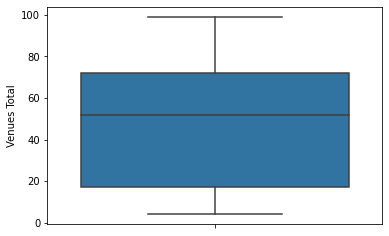

In [25]:
# Make a boxplot of spread of venues using 'Venues Total'

mn = round(t['Venues Total'].min(), 3)
mx = round(t['Venues Total'].max(), 3)
mdn = round(t['Venues Total'].median(), 3)

print('\n')
print('The total number of venues in neighborhoods lies between', mn, 'and', mx, '. The median is:', mdn)

sns.boxplot(data=t, y='Venues Total')
plt.show()

In [26]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
SF_grouped.head()

,Neighborhood,ATM,Adult Boutique,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bayview-Hunters Point,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000
1,Castro/Noe Valley,0.0,0.016949,0.0,0.016949,0.00,0.000000,0.0,0.00,0.0,...,0.016949,0.0,0.0,0.000000,0.000000,0.00,0.033898,0.016949,0.0,0.033898
2,Chinatown,0.0,0.000000,0.0,0.030000,0.01,0.000000,0.0,0.01,0.0,...,0.000000,0.0,0.0,0.010000,0.020000,0.01,0.000000,0.000000,0.0,0.010000
3,Haight-Ashbury,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.032258
4,Hayes Valley/Tenderloin/North of Market,0.0,0.000000,0.0,0.000000,0.00,0.010101,0.0,0.00,0.0,...,0.000000,0.0,0.0,0.020202,0.040404,0.00,0.030303,0.010101,0.0,0.000000


In [27]:
SF_grouped.shape

(21, 224)

In [28]:
# Add 'Venues Total' column by merging 'SF_grouped' with 't'

SF_grouped = t.merge(SF_grouped, on='Neighborhood')
SF_grouped.head()

,Neighborhood,Venues Total,ATM,Adult Boutique,Alternative Healer,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Bayview-Hunters Point,6,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000
1,Castro/Noe Valley,57,0.0,0.016949,0.0,0.016949,0.00,0.000000,0.0,0.00,...,0.016949,0.0,0.0,0.000000,0.000000,0.00,0.033898,0.016949,0.0,0.033898
2,Chinatown,99,0.0,0.000000,0.0,0.030000,0.01,0.000000,0.0,0.01,...,0.000000,0.0,0.0,0.010000,0.020000,0.01,0.000000,0.000000,0.0,0.010000
3,Haight-Ashbury,30,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.032258
4,Hayes Valley/Tenderloin/North of Market,99,0.0,0.000000,0.0,0.000000,0.00,0.010101,0.0,0.00,...,0.000000,0.0,0.0,0.020202,0.040404,0.00,0.030303,0.010101,0.0,0.000000


#### Visualizing venues per neighborhood

Create a bubble map of the distribution of the venues

In [29]:
m = df_sf.merge(t, on='Neighborhood')

# Create bubble map of age distribution in group 20-34 year using latitude and longitude values
map_vsf = folium.Map(location=[latitude, longitude], zoom_start=12)

# add bubbles to map
for i in range(0,len(m)):
   folium.CircleMarker(
      location=[m.iloc[i]['Latitude'], m.iloc[i]['Longitude']],
      popup=m.iloc[i]['Neighborhood'],
      radius=float(m.iloc[i]['Venues Total'])*0.4,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map_vsf)

map_vsf

#### Print top 5 venues of each neighborhood along with total number of venues.

In [30]:
num_top_venues = 5

for nh in SF_grouped['Neighborhood']:
    print("***", nh, "***")
    print('\n')
    print('Total venues in', nh,':', SF_grouped.loc[SF_grouped['Neighborhood'] == nh]['Venues Total'].values)
    print('\n')
    temp = SF_grouped[SF_grouped['Neighborhood'] == nh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[2:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('________________________________________________')
    print('\n')  

*** Bayview-Hunters Point ***


Total venues in Bayview-Hunters Point : [6]


                        venue  freq
0               Jewelry Store  0.17
1             Motorcycle Shop  0.17
2                 Coffee Shop  0.17
3              Lighting Store  0.17
4  Construction & Landscaping  0.17
________________________________________________


*** Castro/Noe Valley ***


Total venues in Castro/Noe Valley : [57]


         venue  freq
0      Gay Bar  0.07
1  Coffee Shop  0.05
2         Park  0.05
3  Yoga Studio  0.03
4   Playground  0.03
________________________________________________


*** Chinatown ***


Total venues in Chinatown : [99]


                 venue  freq
0                Hotel  0.08
1             Boutique  0.06
2          Coffee Shop  0.05
3  American Restaurant  0.03
4       Clothing Store  0.03
________________________________________________


*** Haight-Ashbury ***


Total venues in Haight-Ashbury : [30]


           venue  freq
0  Grocery Store  0.10
1    Coffee Shop

#### Put it into a _pandas_ dataframe

In [31]:
#  Function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
# Create the new dataframe and display the top 5 venues for each neighborhood

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SF_grouped['Neighborhood']

for ind in np.arange(SF_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SF_grouped.iloc[ind, 1:], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bayview-Hunters Point,Motorcycle Shop,Jewelry Store,Coffee Shop,Construction & Landscaping,Lighting Store
1,Castro/Noe Valley,Gay Bar,Park,Coffee Shop,Clothing Store,Grocery Store
2,Chinatown,Hotel,Boutique,Coffee Shop,Cocktail Bar,American Restaurant
3,Haight-Ashbury,Grocery Store,Coffee Shop,Bakery,Yoga Studio,Café
4,Hayes Valley/Tenderloin/North of Market,Café,Sandwich Place,Vietnamese Restaurant,Coffee Shop,Hotel


### Final remark on the data

It looks like the presense of age group 20-34 and the number of venues are positively associated. Let's look into this more closely and start analyzing the data.




## 3. Methodology <a name="methodology"></a>

The research focuses on determining at least one area in San Francisco where the predominant age group is 20-34 years old and where there are enough venues to pull prospective costumers towards the area.

We have collected and/or mapped 1) the San Francisco neighborhoods, 2) the age distribution of every neighborhood and, 3) the total number and the top 5 venues within a 500 meter radius of the neighborhood centers (according to Foursquare categorization).

In the next steps the data will analyzed using the following methods:  
1) Compare the relative presence of age groups in each neighborhood to determine where the target group is the dominant age group.

2) Apply the Age Venues Equation (AVE) method to the data and visualize.  
**AVE = (prop. people in '20-34 years' *  'Venues Total')/100**  
This equation results in a value between 0 and 1, the higher the value the more interesting this neighborhood will be for our client.  
Next, visualize the AVE distribution using a bubble map (Folium Library) and analyze the AVEs using min/max/median, and visualize the variation in a boxplot.

3) K-means Clustering, to find (clusters of) neighborhoods.  
The first step after clustering will be the creation of map using the Folium Library. Next, every clusters will be analyzed on neighborhood level, looking at their AVE score and venue distribution.


## 4. Analysis <a name="analysis"></a>

### 4.1 Age distribution per neighborhood

#### In which neighborhoods is the target group (20-34 years old) the dominant group?

In [34]:
df_sf = df_sf.sort_values(by='20-34 years', ascending=False)


# Drop lat/long to make a neat list
df_sf_ag = df_sf.drop(['Latitude', 'Longitude'], axis=1)
display(df_sf_ag)
print('\n')

# Print list of neighborhoods where 20-34 is dominant age group
print('List of neighborhoods where 20-34 years old is dominant:')
df_sf['Neighborhood'].head(11)

,Zip Code,Neighborhood,0-19 years,20-34 years,35-54 years,55-64 years,65+ years
14,94123,Marina,0.107,0.426,0.270,0.068,0.127
10,94117,Haight-Ashbury,0.154,0.393,0.290,0.073,0.089
4,94109,Polk/Russian Hill (Nob Hill),0.070,0.391,0.260,0.111,0.167
2,94107,Potrero Hill,0.123,0.369,0.307,0.106,0.106
1,94103,South of Market,0.092,0.369,0.324,0.111,0.167
8,94115,Western Addition/Japantown,0.132,0.328,0.284,0.090,0.166
3,94108,Chinatown,0.096,0.314,0.256,0.111,0.225
0,94102,Hayes Valley/Tenderloin/North of Market,0.106,0.313,0.285,0.111,0.225
11,94118,Inner Richmond,0.147,0.311,0.267,0.116,0.160
18,94132,Lake Merced,0.222,0.298,0.219,0.105,0.156




List of neighborhoods where 20-34 years old is dominant:


14                                     Marina
10                             Haight-Ashbury
4                Polk/Russian Hill (Nob Hill)
2                                Potrero Hill
1                             South of Market
8                  Western Addition/Japantown
3                                   Chinatown
0     Hayes Valley/Tenderloin/North of Market
11                             Inner Richmond
18                                Lake Merced
19                      North Beach/Chinatown
Name: Neighborhood, dtype: object

### 4.2 Analysis of age distribution

Based on age there are 11 neighborhoods where the target group, 20-34 years old, is dominant over other age groups (see list above). In six of those neighborhoods the target group makes up at least 33% of the population: Marina (0.43), Haight-Ashbury (0.39), Polk/Russian Hill (0.39), Portrero Hill (0.37), South of Market (0.37) and Western Addition/Japantown (0.33).



### 4.3 Age Venues Equation (AVE) per neighborhood

We are looking for neighborhoods where the presence of the target age and the number of venues are both high. Keeping in mind that age distribution has precedence over venues, we are going to calculate the weight of the venues by multiplying the total number of venues in a neighborhood  with the age distribution of the 20-34 years old population of that neighborhood. Since the product of this multiplication lies between 0 and 100 we will divide it by 100 to get a number between 0-1. The result is the Age Venues Equation (AVE). The closer this number is to 1, the higher the weight of the venues. 

In [75]:
# Make a new df containing the features 'Neighborhood', 'Latitude', Longitude', 20-34 years' and 'Venues Total'. 
# To get this, drop columns from 'df_sf' and merge it to 't'. 
# Introduce the AVE by adding a column containing the AVE formula: ('20-34 years' * 'Venues Total')/100. 
# Next merge the df with top 5 venues table, 'neighborhoods_venues_sorted'.

n = df_sf
n = n.drop(['0-19 years', '35-54 years', '55-64 years', '65+ years'], axis=1)
df_sfn = n.merge(t, on='Neighborhood')
df_sfn['AVE'] = (df_sfn['20-34 years']*df_sfn['Venues Total'])/100
m = df_sfn.merge(neighborhoods_venues_sorted, on='Neighborhood')
display(m.head())
m.info()

,Zip Code,Neighborhood,Latitude,Longitude,20-34 years,Venues Total,AVE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420,0.313,99,0.30987,Café,Hotel,Sandwich Place,Coffee Shop,Vietnamese Restaurant
1,94103,South of Market,37.780,-122.410,0.369,69,0.25461,Coffee Shop,Theater,Sandwich Place,Vietnamese Restaurant,Bakery
2,94107,Potrero Hill,37.770,-122.390,0.369,80,0.29520,Food Truck,Coffee Shop,Gym,Pharmacy,Café
3,94108,Chinatown,37.791,-122.409,0.314,98,0.30772,Hotel,Coffee Shop,Boutique,Cocktail Bar,Sushi Restaurant
4,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420,0.391,83,0.32453,Grocery Store,Sushi Restaurant,Bar,Wine Bar,Pet Store


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zip Code               21 non-null     int64  
 1   Neighborhood           21 non-null     object 
 2   Latitude               21 non-null     float64
 3   Longitude              21 non-null     float64
 4   20-34 years            21 non-null     float64
 5   Venues Total           21 non-null     int64  
 6   AVE                    21 non-null     float64
 7   1st Most Common Venue  21 non-null     object 
 8   2nd Most Common Venue  21 non-null     object 
 9   3rd Most Common Venue  21 non-null     object 
 10  4th Most Common Venue  21 non-null     object 
 11  5th Most Common Venue  21 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.1+ KB


,Zip Code,Neighborhood,Latitude,Longitude,20-34 years,Venues Total,AVE
14,94123,Marina,37.800,-122.435205,0.426,98,0.41748
4,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420000,0.391,83,0.32453
0,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420000,0.313,99,0.30987
3,94108,Chinatown,37.791,-122.409000,0.314,98,0.30772
2,94107,Potrero Hill,37.770,-122.390000,0.369,80,0.29520
1,94103,South of Market,37.780,-122.410000,0.369,69,0.25461
19,94133,North Beach/Chinatown,37.800,-122.440000,0.291,71,0.20661
11,94118,Inner Richmond,37.780,-122.460000,0.311,66,0.20526
7,94114,Castro/Noe Valley,37.760,-122.440000,0.280,59,0.16520
13,94122,Sunset,37.760,-122.480000,0.276,58,0.16008




The AVE scores are between 0.006 and 0.417 . The median is: 0.145


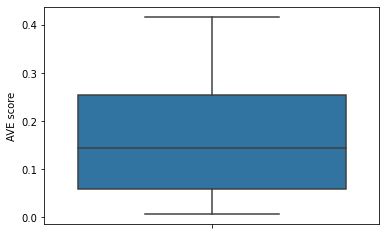

In [76]:
# Determine the AVE scores per neighborhood and the spread of the AVE scores using min/max/median and a boxplot

df_sfn = df_sfn.sort_values(by='AVE', ascending=False)
display(df_sfn)
print('\n')

mn = round(df_sfn['AVE'].min(), 3)
mx = round(df_sfn['AVE'].max(), 3)
mdn = round(df_sfn['AVE'].median(), 3)

print('The AVE scores are between', mn, 'and', mx, '. The median is:', mdn)

sns.boxplot(data=df_sfn, y='AVE')
plt.ylabel('AVE score')
plt.show()


In [77]:
# Create bubble map of AVE scores using latitude and longitude values
map_ave = folium.Map(location=[latitude, longitude], zoom_start=12)

# add bubbles to map
for i in range(0,len(df_sfn)):
   folium.CircleMarker(
      location=[df_sfn.iloc[i]['Latitude'], df_sfn.iloc[i]['Longitude']],
      popup=df_sfn.iloc[i]['Neighborhood'],
      radius=float(df_sfn.iloc[i]['AVE'])*100,
      color='crimson',
      fill=True,
      fill_color='blue'
   ).add_to(map_ave)

map_ave

###  4.3 Analysis of AVE scores


The range of the AVE scores is 0.411 and lies between 0.006 and 0.417. The median score is 0.145. Looking at 1) neighborhoods sorted on AVE score, and 2) the bubble map of the AVE score per neighborhoods, the neighborhoods that look like possible locations are Marina, Polk/Russian Hill, Hayes Valley/Tenderloin/north of Market, Chinatown, and Portrero. All are situated in the north east of the peninsula.  
Might this be a cluster with similar AVE scores and venue types? This will be researched in the next section using K-Means.

### 4.4 Clustering neighborhoods with K-Means

In [78]:
# Import k-means from clustering stage
from sklearn.cluster import KMeans

In [79]:
# Run _k_-means to cluster the neighborhoods into 3 clusters

# set number of clusters
kclusters = 3

SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SF_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 2, 1, 0, 0, 0, 2, 1])

In [80]:
# Create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SF_merged = df_sfn

# merge NY_grouped with NY_data to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

display(SF_merged.info()) #check values
SF_merged.head() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 14 to 16
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zip Code               21 non-null     int64  
 1   Neighborhood           21 non-null     object 
 2   Latitude               21 non-null     float64
 3   Longitude              21 non-null     float64
 4   20-34 years            21 non-null     float64
 5   Venues Total           21 non-null     int64  
 6   AVE                    21 non-null     float64
 7   Cluster Labels         21 non-null     int32  
 8   1st Most Common Venue  21 non-null     object 
 9   2nd Most Common Venue  21 non-null     object 
 10  3rd Most Common Venue  21 non-null     object 
 11  4th Most Common Venue  21 non-null     object 
 12  5th Most Common Venue  21 non-null     object 
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 2.2+ KB


None

,Zip Code,Neighborhood,Latitude,Longitude,20-34 years,Venues Total,AVE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,94123,Marina,37.800,-122.435205,0.426,98,0.41748,1,Cosmetics Shop,Italian Restaurant,Wine Bar,Gym / Fitness Center,French Restaurant
4,94109,Polk/Russian Hill (Nob Hill),37.790,-122.420000,0.391,83,0.32453,1,Grocery Store,Sushi Restaurant,Bar,Wine Bar,Pet Store
0,94102,Hayes Valley/Tenderloin/North of Market,37.780,-122.420000,0.313,99,0.30987,1,Café,Hotel,Sandwich Place,Coffee Shop,Vietnamese Restaurant
3,94108,Chinatown,37.791,-122.409000,0.314,98,0.30772,1,Hotel,Coffee Shop,Boutique,Cocktail Bar,Sushi Restaurant
2,94107,Potrero Hill,37.770,-122.390000,0.369,80,0.29520,1,Food Truck,Coffee Shop,Gym,Pharmacy,Café


In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['Latitude'], SF_merged['Longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster + 1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

# add legend underneath map
print('Legend', '\n','Red:    Cluster 1', '\n', 'Purple: Cluster 2', '\n', 'Teal:   Cluster 3')

Legend 
 Red:    Cluster 1 
 Purple: Cluster 2 
 Teal:   Cluster 3


### 4.5 Analysis of clustered neighborhoods 

#### What are their main themes of the clusters and how can they be characterized?


 

### Cluster 1: the Mixed-Use Cluster

In [82]:
# Display all the neighborhoods in the cluster
SF_merged.loc[SF_merged['Cluster Labels'] == 0, SF_merged.columns[[1] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,20-34 years,Venues Total,AVE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,South of Market,0.369,69,0.25461,0,Coffee Shop,Theater,Sandwich Place,Vietnamese Restaurant,Bakery
19,North Beach/Chinatown,0.291,71,0.20661,0,Italian Restaurant,Wine Bar,French Restaurant,Gym / Fitness Center,Mexican Restaurant
11,Inner Richmond,0.311,66,0.20526,0,Sushi Restaurant,Pet Store,Pizza Place,Japanese Restaurant,Wine Shop
7,Castro/Noe Valley,0.280,59,0.16520,0,Gay Bar,Coffee Shop,Park,Yoga Studio,Thai Restaurant
13,Sunset,0.276,58,0.16008,0,Bakery,Bubble Tea Shop,Vietnamese Restaurant,Deli / Bodega,Chinese Restaurant
5,Inner Mission/Bernal Heights,0.290,50,0.14500,0,Mexican Restaurant,Grocery Store,Dive Bar,Italian Restaurant,Pizza Place
9,Parkside/Forest Hill,0.207,56,0.11592,0,Chinese Restaurant,Park,Light Rail Station,Pizza Place,Café
6,Ingelside-Excelsior/Crocker-Amazon,0.219,47,0.10293,0,Pizza Place,Mexican Restaurant,Chinese Restaurant,Café,Bar


#### The neighborhoods in Cluster 1 and their top 5 venues (normalized):
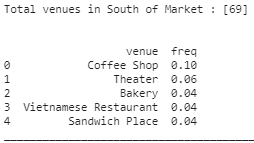 | 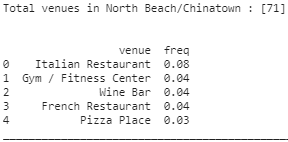   
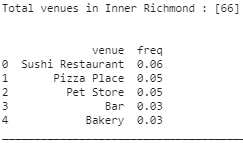 | 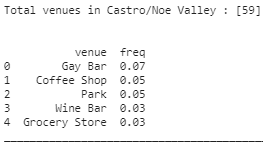  
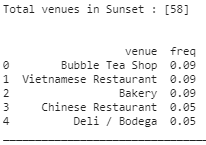 | 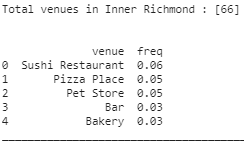  
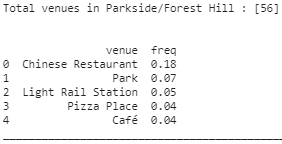 | 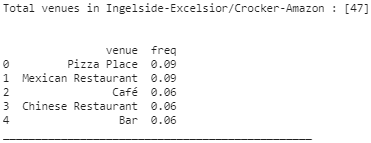

#### Cluster 1: the 'Mixed-Use' cluster 
The eight neighborhoods in the cluster are spread out over the peninsula. Their AVE scores lie between 0.103 and 0.255, which is in the 25-75% range of the total number of AVE scores (median = 0.145).  

The number of venues in the neighborhoods range from 47 to 71. Which is, compared to other neighborhoods on the peninsula, quite high (median = 56). The venues can be characterized by three themes:
1. __Day-to-day living__, with bakeries, groceries, deli's, pet stores, coffee shops and restaurants..
2. __Public spaces__, like parks and light rail stations.
3. __Night life__, with theatres, cafes and bars.

This cluster can be characterized as a mixed-use cluster. On the one hand there are residents, with shops, venues and recreational spaces for their specific use, and on the other hand there are night life venues.

### Cluster 2: the Hospitality, Health and Luxury Cluster


In [83]:
SF_merged.loc[SF_merged['Cluster Labels'] == 1, SF_merged.columns[[1] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,20-34 years,Venues Total,AVE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
14,Marina,0.426,98,0.41748,1,Cosmetics Shop,Italian Restaurant,Wine Bar,Gym / Fitness Center,French Restaurant
4,Polk/Russian Hill (Nob Hill),0.391,83,0.32453,1,Grocery Store,Sushi Restaurant,Bar,Wine Bar,Pet Store
0,Hayes Valley/Tenderloin/North of Market,0.313,99,0.30987,1,Café,Hotel,Sandwich Place,Coffee Shop,Vietnamese Restaurant
3,Chinatown,0.314,98,0.30772,1,Hotel,Coffee Shop,Boutique,Cocktail Bar,Sushi Restaurant
2,Potrero Hill,0.369,80,0.29520,1,Food Truck,Coffee Shop,Gym,Pharmacy,Café


#### The neighborhoods in Cluster 2 and their top 5 venues (normalized):  
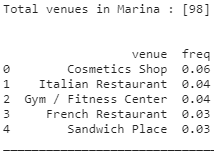 | 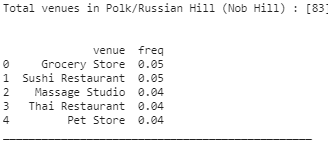  
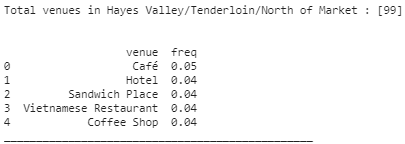  
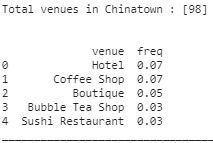 | 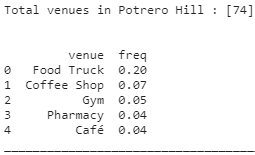


#### Cluster 2: the 'Hospitality, Health and Luxury' cluster 
In contrast to the two other clusters, this cluster is formed by five adjacent neighborhoods. Also, all five of them are  characterized by a large population of young people (20-34 years old) and a high number of businesses. This results in AVE scores that add up to the top 25% of the San Francisco scores (0.295-0.417). 

The number of venues range from 80 to 99. In this cluster two themes can be distinguished:
1. __Hospitality__, with hotels, coffee shops, wine bars and restaurants
2. __Health and Luxury__, with cosmetic shops, fitness centers, massage studios, and boutiques

The presence of a large number of businesses and the relative absence of common venues, like grocery stores, hairdressers or pizza restaurants, makes this cluster less residential and more business oriented with an emphasis on Hospitality, Health and Luxury.

### Cluster 3: The Residential Cluster


In [84]:
SF_merged.loc[SF_merged['Cluster Labels'] == 2, SF_merged.columns[[1] + list(range(4, SF_merged.shape[1]))]]

,Neighborhood,20-34 years,Venues Total,AVE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
10,Haight-Ashbury,0.393,30,0.11790,2,Coffee Shop,Grocery Store,Bakery,Boutique,Bubble Tea Shop
8,Western Addition/Japantown,0.328,34,0.11152,2,Chinese Restaurant,Park,Spa,Sushi Restaurant,Furniture / Home Store
18,Lake Merced,0.298,20,0.05960,2,Gym,Café,Park,Sushi Restaurant,Performing Arts Venue
17,Twin Peaks-Glen Park,0.217,17,0.03689,2,Park,Yoga Studio,Bookstore,Library,Mexican Restaurant
12,Outer Richmond,0.225,8,0.01800,2,General Entertainment,Tunnel,Park,National Park,Brewery
20,Visitacion Valley/Sunnydale,0.202,4,0.00808,2,Music Venue,Garden,Park,Baseball Field,Yoga Studio
15,Bayview-Hunters Point,0.227,3,0.00681,2,Coffee Shop,Lighting Store,Motorcycle Shop,Yoga Studio,Food Truck
16,St. Francis Wood/Miraloma/West Portal,0.154,4,0.00616,2,Bus Line,Park,Scenic Lookout,Fountain,Yoga Studio


#### The neighborhoods in Cluster 3 and their top 5 venues (normalized):  

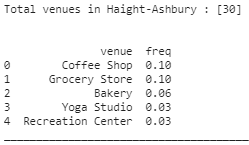 | 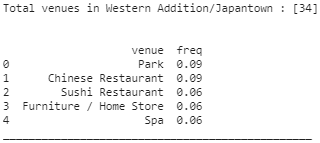 | 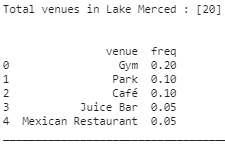  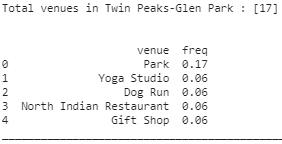 | 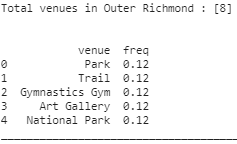  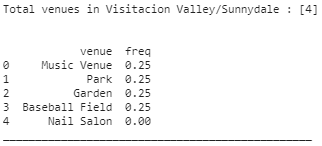 | 
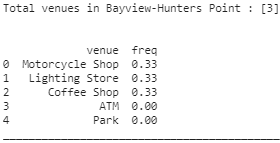  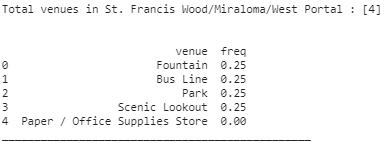


#### Cluster 3: the 'Residential' cluster
The eight neighborhoods in this cluster are, like Cluster 1, spread out over the peninsula. The members all haver low AVE scores (0.006-0.118, median = 0.145). Note that two of the neighborhoods, Haight-Ashbury and Western Addition/Japantown, have high scores on the target population (>= 33%). Also, 3 out of 8 neighborhoods list only three or four venues.  

The number of venues in the neighborhoods range from 3 to 34 and can be characterized by two motifs:
1. __Day-to-day living__, with a bakery, a grocery, a salon/barbershop, a juice bar, a few coffee shops and restaurants, a furniture/home store, a gym, a yoga studio, and a spa.
2. __Public and/or recreational spaces__, this cluster has, compared to the other clusters, a lot of public and/or recreational spaces like parks, a garden, a fountain, a dog run, and a lookout point, an art gallery, a tennis court, and a baseball field.

The spaces in this cluster are primarily used for living with a high presence of public and/or recreational spaces and an overall low presence of businesses.

## 5. Results and Discussion <a name="results"></a>

This report describes how the age and venue distribution in San Francisco neighborhoods were analyzed in order to make a data driven recommendation on the most suitable area to establish a CBD selling point. The recommendation needed to fall within three parameters (in order of importance): 1) the preferred area is a cluster of neighborhoods, 2) the dominant age group in the area is 20 -34 years (the target age group), and 3) the area has enough businesses to attract people that are interested health and/or are looking for fun.   

Looking at age we determined 11 candidate neighborhoods where the target group is dominant over other age groups. In six of those the target age group constitutes at least 33% of the neighborhood population. Since the age distribution has precedence over venues, we then calculated the weighted venue score per neighborhood, the AVE. Next, using the AVE scores and mapping the scores in a bubble map five candidates situated in the northeast of the peninsula emerged: Marina, Polk/Russian Hill, Hayes Valley/Tenderloin/north of Market, Chinatown, and Portrero Hill.  

Using K-Means clustering the neighborhoods were then clustered on the type of venues within their borders. This resulted in three clusters. Two of the clusters fall within the parameters: the Mixed-Use cluster (MU cluster), and the Hospitality, Health and Luxury cluster (HHL cluster). The MU cluster comprises eight neighborhoods that are spread out over the peninsula. Their AVE scores and the number of venues are medium high. There are retail and recreational spaces for day-to-day living, and there is night life, like theatres, cafes, and bars. The HHL cluster comprises five neighborhoods with a relative high number of the 20-34 age group and the highest AVE scores: Marina, Polk/Russian Hill, Hayes Valley/Tenderloin/North of Market, Chinatown, and Portrero Hill. All are next to one another and situated in the northeast of the Peninsula. The cluster is primarily business oriented with an emphasis on Hospitality (Hotels, Bars, Cafes), Health (Spa, Fitness, Cosmetics) and Luxury (Boutiques), which falls into the stated guidelines.  

Our analysis points towards the HHL cluster as the preferred starting point for the location search. The layout of this cluster, the five adjacent neighborhoods, strengthens this recommendation. When going into the next stage of the decision-making process the client should keep an open mind to the other neighborhoods that emerged in this research. Especially South of Market, North Beach/Chinatown and Western Addition/Japantown, which are within/next to the HHL cluster and have a 20-34 years old population of around 33% of the total neighborhood population. Looking for an actual location in the northeast area of the Peninsula will also require the collection of new data, like real estate availability and prices, the spread of existing CBD selling points in the area vs the size of the local CBD market, and the movements of (potential) customers to, through and from the cluster.  

Finally, we would like to discuss two considerations related to the data. The first is that the Foursquare data might be skewed by 1) the lack of users in a certain area, and/or 2) by imitation behavior of users. Certain types of venues might get more than average attention, while others might get less. Also, certain types of venues might never appear in the app. Follow-up research should take this into account and use multiple data sources to get a more valid dataset. The second consideration is the fluctuating nature of the Foursquare data. Even when analyzing the venues, minor shifts in the top 5s were observed. This makes reproduction of the research difficult and the reliability less robust.


## 6. Conclusion <a name="conclusion"></a>

This research analyzed age -, venue distribution, and neighborhood clustering in San Francisco to make a data driven recommendation on the most suitable area to start the search for a CBD shop location. After analysis two strong candidates emerged. With the stronger representation of the target age group, with better AVE scores, and with relevant businesses like cafes, bars, spas, and fitness centers the Hospitality, Health and Luxury cluster (HHL cluster) is the most likely starting point. This position is strengthened by the adjacent position of the neighborhoods within the HHL cluster and the existence of three interesting neighborhoods around/within the HHL cluster.   

Finally, looking at the results of this research the question arises if this report might also be interesting for other businesses that are targeting 20-34 years old with an interest in health and a healthy lifestyle. Of course, it cannot be used as a final answer but, just like it is intended here, as a starting point to find a suitable location.

**References**

Brightfield Group(2017). Understanding cannabidiol. Retrieved from https://daks2k3a4ib2z.cloudfront.net/595e80a3d32ef41bfa200178/59946dd86c6b200001c5b9cb_CBD_-_HelloMD_Brightfield_Study_-_Expert_Report_-_FINAL.pdf

Consumer Reports (2019). CBD Goes Mainstream. Retrieved from https://www.consumerreports.org/cbd/cbd-goes-mainstream/

Leung, V. (2019). Data Clustering in San Francisco Neighborhoods. On: Towards Data Science. Retrieved from https://towardsdatascience.com/kickstart-your-first-clustering-project-in-san-francisco-neighborhoods-e258e659440c

San Francisco Department of Public Health (2004). San Francisco Burden of Disease & Injury Study:
Determinants of Health. Retrieved from http://www.healthysf.org/bdi/outcomes/zipmap.htm

Statista (2012). Estimated dollar sales of the CBD market in the United States in 2019, by state (in million U.S. dollars). Retrieved from  https://www.statista.com/statistics/1065838/dollar-sales-of-us-cbd-market-by-state/

US Census Bureau (2019). American Community Survey. Retrieved from https://data.census.gov/cedsci/table?q=United%20States&t=Age%20and%20Sex&g=8600000US94102,94103,94107,94108,94109,94110,94112,94114,94115,94116,94117,94118,94121,94122,94123,94124,94127,94131,94132,94133,94134&y=2019&tid=ACSDP5Y2019.DP05&moe=false&tp=true&hidePreview=true

All sources were accessed in april, 2021 

